### Imports

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from pyproj import Proj

In [21]:
INPUT_DIR = '../../data/chelonioidea'
INPUT_CSV = 'sea_turtles_australia.csv'

### Data Exploration

In [22]:
sea_turtles = pd.read_csv(os.path.join(INPUT_DIR, INPUT_CSV))

In [23]:
sea_turtles.head()

,species,locality,occurrenceStatus,decimalLatitude,decimalLongitude,eventDate,year,taxonKey,speciesKey
0,Lepidochelys olivacea,WOONGARRA:OAKS,present,-24.7705,152.4182,12/31/1997 19:00,1998,2442153,2442153
1,Natator depressus,WOONGARRA:RIFLERANGE CK,present,-24.8483,152.4683,12/31/1996 19:00,1997,2442173,2442173
2,Natator depressus,WOONGARRA:NEILSON PK,present,-24.8060,152.4548,12/31/1974 19:00,1975,2442173,2442173
3,Lepidochelys olivacea,ZUNA ISLAND,present,-10.7191,142.2930,12/31/1998 19:00,1999,2442153,2442153
4,Caretta caretta,WOONGARRA:RIFLERANGE CK,present,-24.8483,152.4683,12/31/1997 19:00,1998,8894817,8894817


### Data Cleaning

In [ ]:
# remove column
del sea_turtles['geometry']

In [24]:
# view list of species
sea_turtles['species'].value_counts()

Natator depressus         2100
Lepidochelys olivacea     1875
Eretmochelys imbricata     876
Chelonia mydas             316
Caretta caretta            246
Dermochelys coriacea        10
Name: species, dtype: int64

In [25]:
# rename columns
sea_turtles.columns = ['species', 'locality', 'status', 'latitude', 'longitude', 'date', 'year', 'taxonKey', 'speciesKey']

# remove nans
sea_turtles = sea_turtles[sea_turtles['longitude'].isna() == False]

# only olive ridley sea turtle
sea_turtles = sea_turtles[sea_turtles['species'] == 'Chelonia mydas']
 
sea_turtles

,species,locality,status,latitude,longitude,date,year,taxonKey,speciesKey
41,Chelonia mydas,WOONGARRA:RIFLERANGE CK,present,-24.8483,152.4683,12/31/1997 19:00,1998,2442225,2442225
128,Chelonia mydas,WOONGARRA:MON REPOS,present,-24.7983,152.4333,12/31/1997 19:00,1998,2442225,2442225
161,Chelonia mydas,WOONGARRA:KELLYS&MONEYS,present,-24.8250,152.4567,12/31/1997 19:00,1998,2442225,2442225
165,Chelonia mydas,WOONGARRA:KELLYS&MONEYS,present,-24.8250,152.4567,12/31/1996 19:00,1997,2442225,2442225
241,Chelonia mydas,WILLIAMSONS BEACH,present,-20.9783,149.0794,12/31/2000 19:00,2001,2442225,2442225
...,...,...,...,...,...,...,...,...,...
4746,Chelonia mydas,BUNDABERG:BAFFLE CK,present,-24.5203,152.0620,12/31/1968 19:00,1969,2442225,2442225
4817,Chelonia mydas,BOWEN:BRISK BAY,present,-20.1046,148.2894,12/31/2011 19:00,2012,2442225,2442225
4848,Chelonia mydas,BELL CAY,present,-21.8200,151.2300,12/31/1975 19:00,1976,2442225,2442225
4950,Chelonia mydas,75 MONKEY IS-STH SIDE,present,-23.1917,150.9583,12/31/1997 19:00,1998,2442225,2442225


### Visualizing with GeoPandas

In [26]:
sea_turtles_gdf = gpd.GeoDataFrame(
    sea_turtles,
    geometry=gpd.points_from_xy(sea_turtles['longitude'], sea_turtles['latitude']))

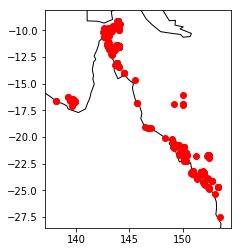

In [27]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent=='Oceania'].plot(color='white', edgecolor='black')
ax.set_xlim([sea_turtles.longitude.min()-1, sea_turtles.longitude.max()+1])
ax.set_ylim([sea_turtles.latitude.min()-1, sea_turtles.latitude.max()+1])
sea_turtles_gdf.plot(ax=ax, color='red')
plt.show()

### Viusualizing with folium

In [30]:
sea_turtle_map = folium.Map(
    location=[-20, 146], 
    tiles = 'Stamen Terrain',
    zoom_start=6,
)

latitudes = sea_turtles['latitude'].tolist()
longitudes = sea_turtles['longitude'].tolist()

for i in range(0,len(latitudes)):
    folium.Circle(
        radius=50,
        location=[latitudes[i], longitudes[i]], 
        popup=sea_turtles['locality'].iloc[i],
        color='red',
        fill=True
    ).add_to(sea_turtle_map)
    
sea_turtle_map